In [88]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [90]:
from sklearn.datasets import fetch_openml

In [92]:
mnist = fetch_openml('mnist_784') #fetching data

In [93]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [96]:
x,y= mnist['data'],mnist['target']

In [98]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [102]:
x.shape

(70000, 784)

In [104]:
y.shape

(70000,)

In [108]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=60000, test_size=10000, stratify=y, random_state=42)

In [110]:
#preprocessing
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
x_test_scaled = scaler.transform(x_test.astype(np.float64))


In [112]:
#SGD classifier
sgd_clf = SGDClassifier(loss='hinge', random_state = 42)
sgd_clf.fit(x_train_scaled, y_train)

SGDClassifier(random_state=42)

In [114]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
#evaluation SGD
print("\n    SGD classification    ")
y_pred_sgd = sgd_clf.predict(x_test_scaled)

print("Accuracy:", accuracy_score(y_test,y_pred_sgd))

print(classification_report(y_test, y_pred_sgd))


    SGD classification    
Accuracy: 0.9025
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       986
           1       0.98      0.96      0.97      1125
           2       0.93      0.88      0.91       999
           3       0.92      0.85      0.88      1020
           4       0.94      0.88      0.91       975
           5       0.90      0.83      0.86       902
           6       0.96      0.94      0.95       982
           7       0.95      0.92      0.93      1042
           8       0.66      0.94      0.78       975
           9       0.91      0.86      0.88       994

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.91     10000



In [118]:
#evaluation rf classifier
print("\n    Random Forest classification    ")
y_pred_rf = rf_clf.predict(x_test)

print("Accuracy:", accuracy_score(y_test,y_pred_rf))

print(classification_report(y_test, y_pred_rf))


    Random Forest classification    
Accuracy: 0.9683
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       986
           1       0.99      0.99      0.99      1125
           2       0.97      0.97      0.97       999
           3       0.96      0.95      0.96      1020
           4       0.97      0.96      0.97       975
           5       0.97      0.96      0.96       902
           6       0.97      0.99      0.98       982
           7       0.97      0.97      0.97      1042
           8       0.96      0.95      0.96       975
           9       0.94      0.95      0.94       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



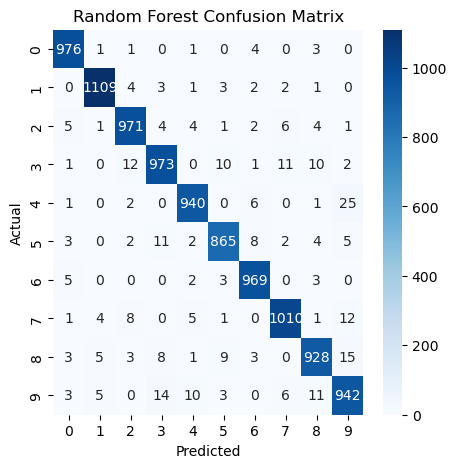

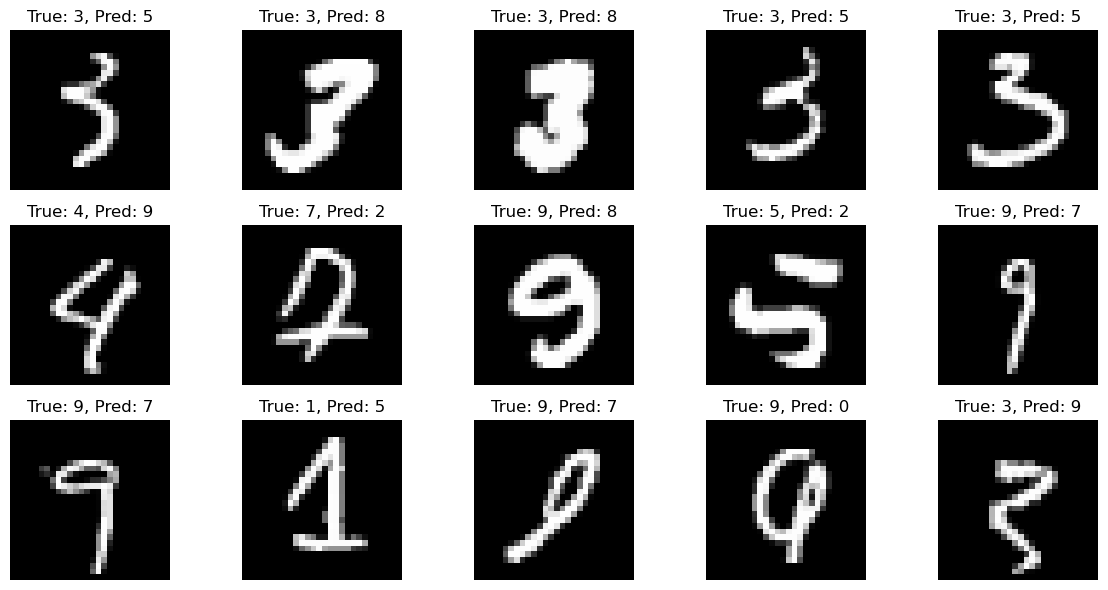

In [130]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting worst misclassifications (incorrect predictions)
wrong_idx = np.where(y_pred_rf != y_test)[0]
worst = wrong_idx[:15]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(worst):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test.iloc[idx].values.reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test.iloc[idx]}, Pred: {y_pred_rf[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

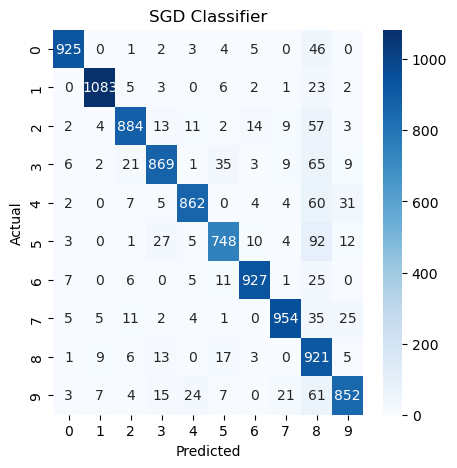

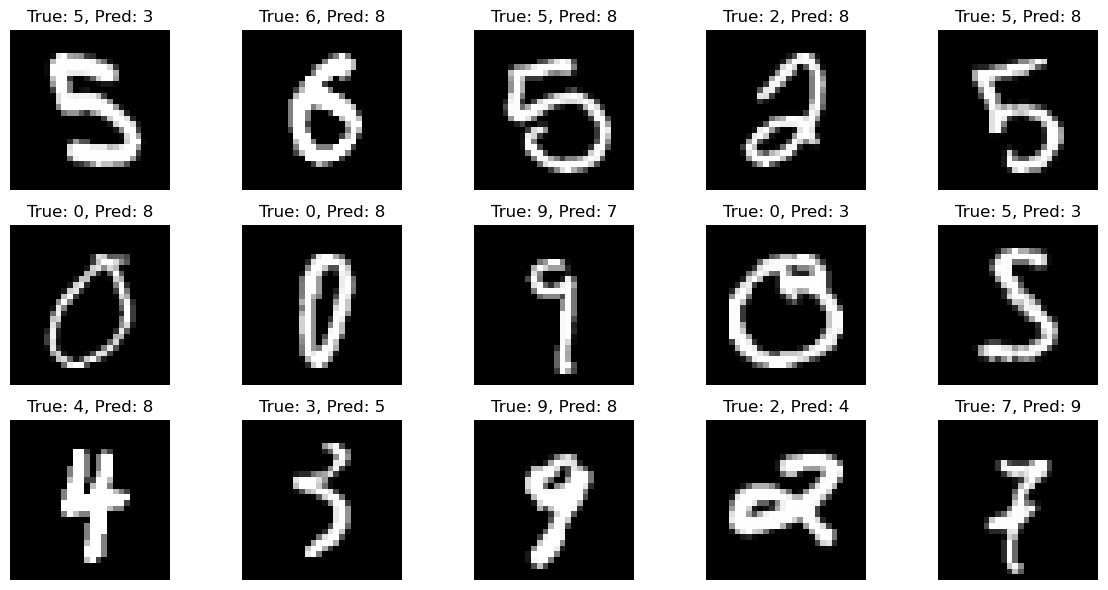

In [132]:
# Confusion matrix for SGD
cm = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SGD Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting worst misclassifications (incorrect predictions)
wrong_idx = np.where(y_pred_sgd != y_test)[0]
worst = wrong_idx[:15]

plt.figure(figsize=(12, 6))
for i, idx in enumerate(worst):
    plt.subplot(3, 5, i+1)
    plt.imshow(x_test.iloc[idx].values.reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_test.iloc[idx]}, Pred: {y_pred_sgd[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [134]:
import numpy as np
import gradio as gr
from skimage.transform import resize

In [166]:
def preprocess_image(pil_img):
    import PIL
    from PIL import ImageOps

    # Convert to grayscale and invert (so background is 0, digit is high)
    img = pil_img.convert("L")
    img = ImageOps.invert(img)

    # Resize to 28x28
    img = img.resize((28, 28))

    # Convert to NumPy array
    img_array = np.array(img)

    # Threshold: Remove noise (optional)
    img_array[img_array < 30] = 0

    # Flatten into 784-length vector
    flat_img = img_array.reshape(1, -1)

    return flat_img

In [168]:
# Define prediction function for Gradio
def predict_digit(pil_img):
    img_vector = preprocess_image(pil_img)
    prediction = rf_clf.predict(img_vector)[0]
    return f"Predicted Digit: {prediction}"

In [170]:
# Gradio Interface
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="pil", image_mode="L", label="Draw a digit (0–9)"),
    outputs="text",
    title="MNIST Digit Recognition (Random Forest)",
    description="Draw a digit on the canvas. The model will try to predict it."
)


In [172]:
interface.launch()

* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.
